In [121]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image


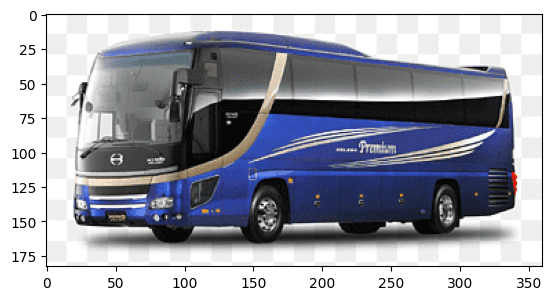

In [23]:
img=load_img(r'/content/drive/MyDrive/base/training/bus/bus (1).png')
plt.imshow(img)

In [24]:
cv2.imread(r'/content/drive/MyDrive/base/training/bus/bus (1).png').shape

(183, 360, 3)

In [26]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [90]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/base/training',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = train.flow_from_directory(r'/content/drive/MyDrive/base/validation',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 31 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [91]:
train_dataset.class_indices

{'bus': 0, 'train': 1}

In [92]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [93]:
num_classes=1
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ="relu",input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(num_classes, activation='sigmoid')
                                   ])

In [94]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [95]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=30,
                      validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 10s 4s/step - loss: 4.6528 - accuracy: 0.4444 - val_loss: 0.9875 - val_accuracy: 0.3871
Epoch 2/30
3/3 [==============================] - 2s 770ms/step - loss: 0.8948 - accuracy: 0.4444 - val_loss: 0.7173 - val_accuracy: 0.3871
Epoch 3/30
3/3 [==============================] - 2s 775ms/step - loss: 0.6999 - accuracy: 0.7143 - val_loss: 0.7372 - val_accuracy: 0.3871
Epoch 4/30
3/3 [==============================] - 3s 957ms/step - loss: 0.7671 - accuracy: 0.4286 - val_loss: 0.6258 - val_accuracy: 0.6452
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.7470 - accuracy: 0.5714 - val_loss: 0.5968 - val_accuracy: 0.7097
Epoch 6/30
3/3 [==============================] - 2s 767ms/step - loss: 0.6999 - accuracy: 0.7778 - val_loss: 0.6356 - val_accuracy: 0.5161
Epoch 7/30
3/3 [==============================] - 2s 709ms/step - loss: 0.5498 - accuracy: 0.7778 - val_loss: 0.4785 - val_accuracy: 0.7419
Epoch 8/30
3/3 [=========

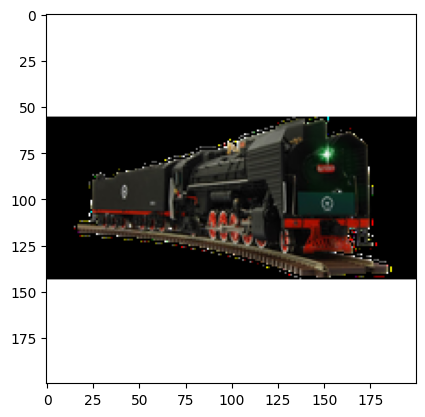

1/1 [==============================] - 0s 42ms/step
it is a train


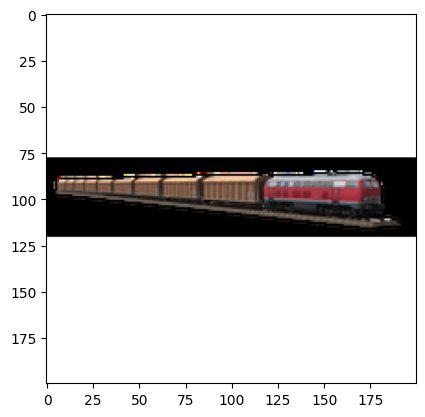

1/1 [==============================] - 0s 40ms/step
it is a train


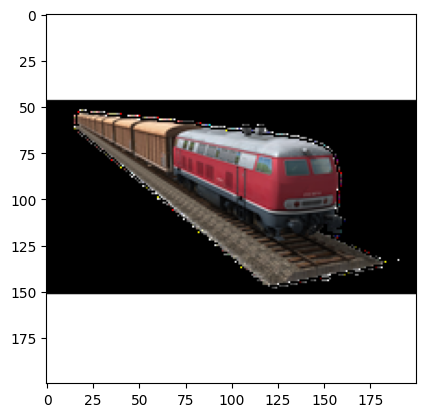

1/1 [==============================] - 0s 38ms/step
it is a train


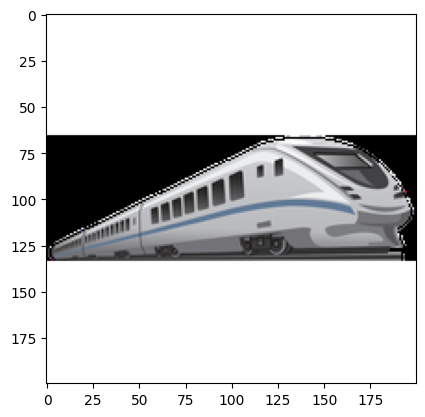

1/1 [==============================] - 0s 43ms/step
it is a bus


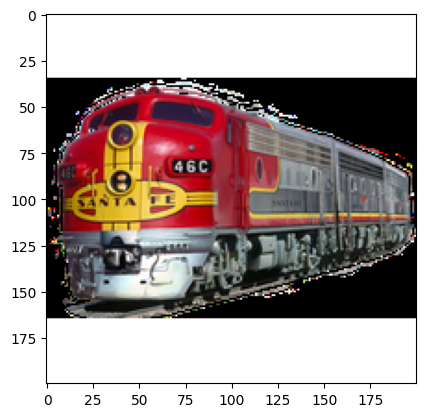

1/1 [==============================] - 0s 38ms/step
it is a train


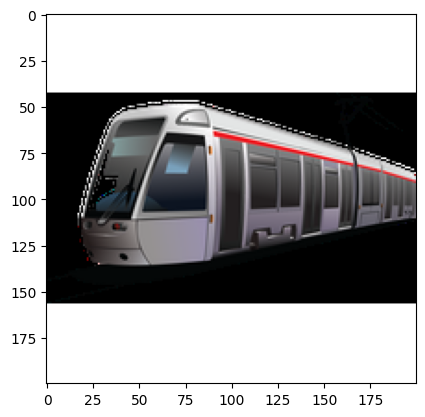

1/1 [==============================] - 0s 39ms/step
it is a train


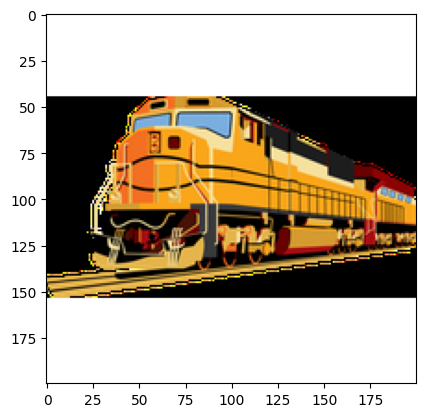

1/1 [==============================] - 0s 39ms/step
it is a train


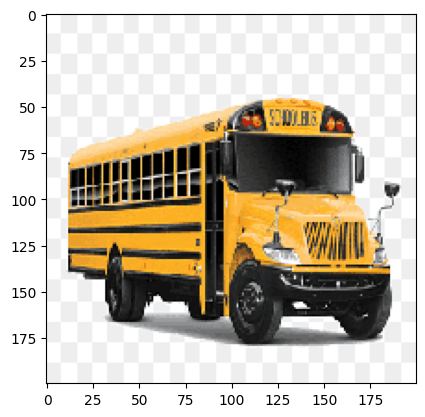

1/1 [==============================] - 0s 38ms/step
it is a train


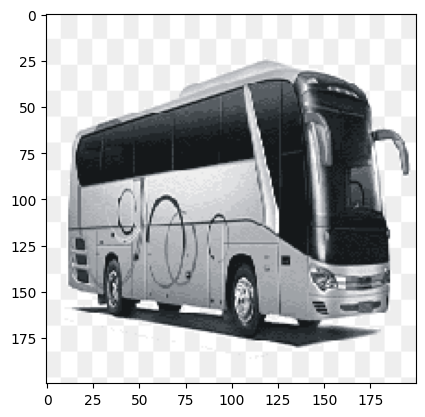

1/1 [==============================] - 0s 37ms/step
it is a train


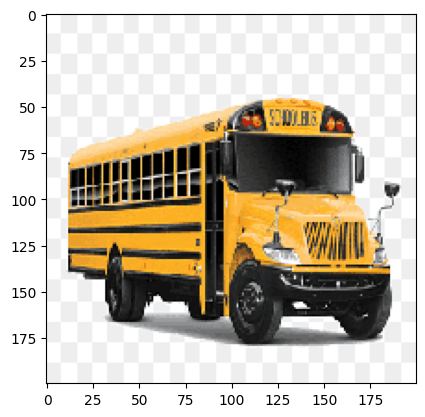

1/1 [==============================] - 0s 50ms/step
it is a train


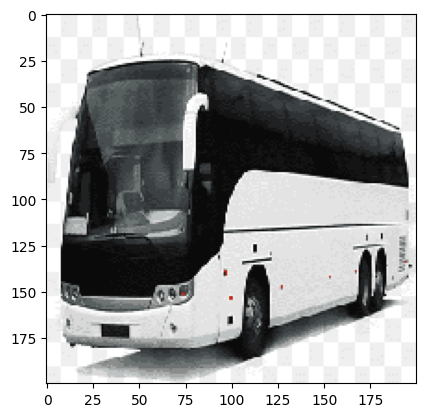

1/1 [==============================] - 0s 40ms/step
it is a bus


IsADirectoryError: ignored

In [133]:
dir_path = '/content/drive/MyDrive/base/testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  images = np.vstack([x])
  val = model.predict(images)
  if val == 0 :
    print("it is a bus")
  elif val == 1:
    print("it is a train")
  else:
    print("error")